In [1]:
import pandas as pd
import plotly.express as px

## Analysis 1
This data is taken from Schroeder et al. Cell 2016. They performed Mutation Accumulation experiments on Mismatch Repair defective B. Subtilis strains to develop a null mutational model for the organism. Then they investigated the transition rate from each trinucleotide across the whole genome. This analysis tries to see if the mutation rates associated with each codon's trinucleotide contain ordinal similarity to Trifonov's amino acid rankings. The final Kendall Tau value and associated p-value argue that there is no relationship between the two

In [2]:
trans_rate=pd.read_csv("./transitionRatesByNeighbor_lyle.csv")
trans_rate

,MMR,Leading strand triplet,normalized transition rate at focal base,lower 95CL,upper 95CL,Codon
0,no_MMR,AAA,1.070000e-09,6.420000e-10,1.660000e-09,K
1,no_MMR,AAC,3.590000e-09,2.300000e-09,5.350000e-09,N
2,no_MMR,AAG,1.780000e-09,1.050000e-09,2.810000e-09,K
3,no_MMR,AAT,1.420000e-09,7.760000e-10,2.380000e-09,N
4,no_MMR,ACA,4.710000e-09,3.240000e-09,6.620000e-09,T
...,...,...,...,...,...,...
59,no_MMR,TGT,4.130000e-09,2.740000e-09,5.960000e-09,C
60,no_MMR,TTA,4.590000e-09,3.160000e-09,6.440000e-09,L
61,no_MMR,TTC,5.630000e-09,4.120000e-09,7.510000e-09,F
62,no_MMR,TTG,1.530000e-08,1.280000e-08,1.810000e-08,L


In [3]:
trans_rate.groupby(['Codon']).mean().sort_values(by="normalized transition rate at focal base").reset_index()

,Codon,normalized transition rate at focal base,lower 95CL,upper 95CL
0,K,1.425000e-09,8.460000e-10,2.235000e-09
1,I,2.483667e-09,1.554333e-09,3.793333e-09
2,N,2.505000e-09,1.538000e-09,3.865000e-09
3,F,3.061500e-09,2.159000e-09,4.265000e-09
4,Stop,5.676667e-09,3.863333e-09,8.110000e-09
5,S,6.814833e-09,5.087675e-09,9.096667e-09
6,L,7.193500e-09,5.457500e-09,9.508333e-09
7,T,7.425000e-09,5.383500e-09,1.016250e-08
8,G,7.830000e-09,5.829000e-09,1.038000e-08
9,C,8.365000e-09,6.420000e-09,1.078000e-08


In [4]:
sorted_by_mutation = list(trans_rate.groupby(['Codon']).mean().sort_values(by="normalized transition rate at focal base").reset_index()['Codon'])
sorted_by_mutation.remove("Stop")
sorted_by_mutation

['K',
 'I',
 'N',
 'F',
 'S',
 'L',
 'T',
 'G',
 'C',
 'M',
 'Y',
 'W',
 'E',
 'R',
 'V',
 'D',
 'Q',
 'P',
 'A',
 'H']

In [5]:
trifonov = ["G", "A", "V", "D", "P", "S", "E", "L", "T", "R", "N", "K", "Q", "I", "C", "H", "F", "M", "Y", "W"]

In [6]:
import scipy.stats as stats
stats.kendalltau(sorted_by_mutation, trifonov, variant='b')

KendalltauResult(correlation=-0.23157894736842105, pvalue=0.16497640636360544)

## Analysis 2
This analysis takes data from Sung et al. 2015 on WT B. Subtilis trinucleotide mutation rates and compares nonsynonymous mutations and their relative rates. The goal would be to see if we observe significant bias towards nonsynonymous mutations inducing AA changes that are more similar to the starting AA than not.

In [7]:
table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }

In [8]:
trinuc_mu = pd.read_csv("./trinuc_mutationrates.csv", names=['Start','End','Rate'])
trinuc_mu

,Start,End,Rate
0,AAA,ACA,0.00
1,AAA,AGA,1.84
2,AAA,ATA,1.84
3,AAC,ACC,3.34
4,AAC,AGC,6.67
...,...,...,...
187,TTG,TCG,17.92
188,TTG,TGG,7.17
189,TTT,TAT,1.44
190,TTT,TCT,0.72


In [9]:
trinuc_mu['Start_Codon'] = trinuc_mu['Start'].map(table)
trinuc_mu['End_Codon'] = trinuc_mu['End'].map(table)
trinuc_mu

,Start,End,Rate,Start_Codon,End_Codon
0,AAA,ACA,0.00,K,T
1,AAA,AGA,1.84,K,R
2,AAA,ATA,1.84,K,I
3,AAC,ACC,3.34,N,T
4,AAC,AGC,6.67,N,S
...,...,...,...,...,...
187,TTG,TCG,17.92,L,S
188,TTG,TGG,7.17,L,W
189,TTT,TAT,1.44,F,Y
190,TTT,TCT,0.72,F,S


In [10]:
x = trinuc_mu.groupby(['Start_Codon', 'End_Codon']).mean().reset_index()
x

,Start_Codon,End_Codon,Rate
0,A,D,2.5650
1,A,E,0.0000
2,A,G,1.2900
3,A,V,10.4375
4,C,F,0.0000
...,...,...,...
84,Y,S,1.2800
85,_,L,5.6900
86,_,S,3.7200
87,_,W,8.9400


In [11]:
x = x.pivot('Start_Codon', 'End_Codon', 'Rate')
x

End_Codon,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,_
Start_Codon,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,2.565,0.000,NaN,1.2900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.4375,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.940,NaN,NaN,NaN,14.140,NaN
D,0.940,NaN,NaN,NaN,NaN,3.4150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
E,0.765,NaN,NaN,NaN,NaN,5.9050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.9800,NaN,NaN,NaN
F,NaN,0.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.055,NaN,NaN,NaN,1.490,NaN
G,0.000,NaN,10.360,16.315,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.2025,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7100,...,NaN,4.7100,NaN,6.3950,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,0.000,NaN,NaN,0.0000,1.110,5.43,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.840,NaN,NaN,...,NaN,NaN,NaN,0.9200,NaN,0.74,NaN,NaN,NaN,NaN


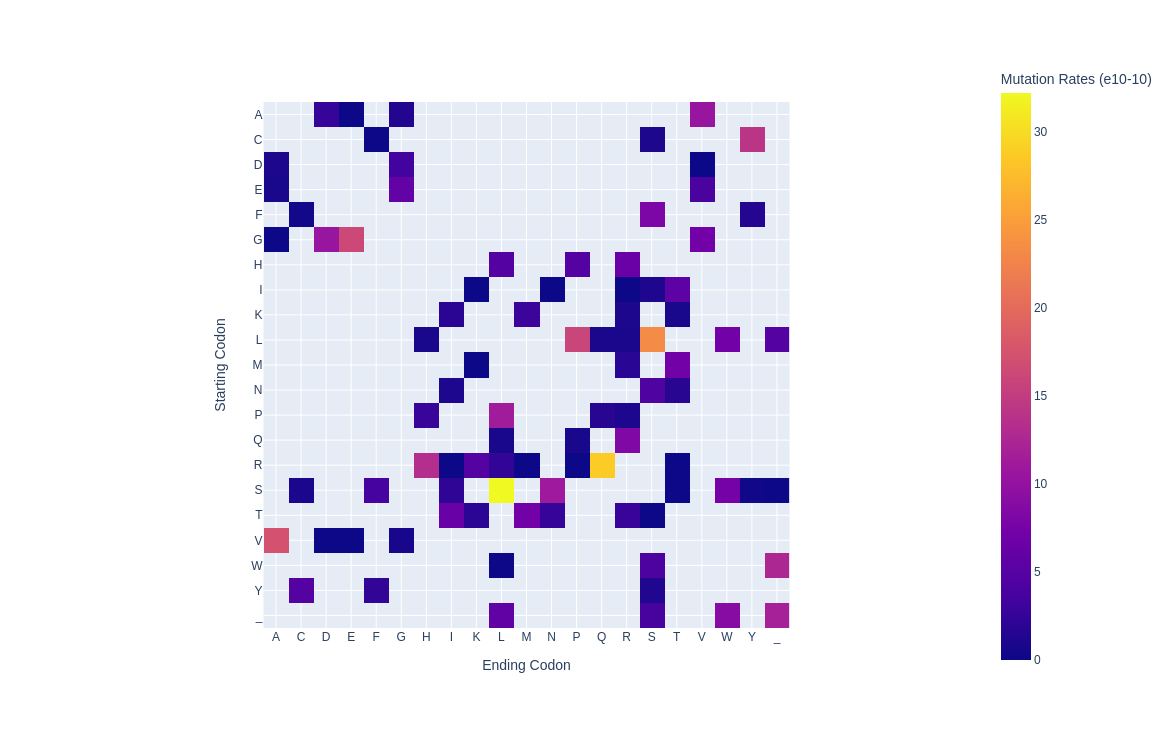

In [26]:
px.imshow(x, labels=dict(y="Starting Codon", x="Ending Codon", color="Mutation Rates (e10-10)"), width=800, height=750)